In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/home/long/longdata/kaggle compe/dataset/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [3]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


passenger_count
0         60
1    1033540
2     210318
3      59896
4      28404
5      78088
6      48333
7          3
8          1
9          1
Name: count, dtype: int64


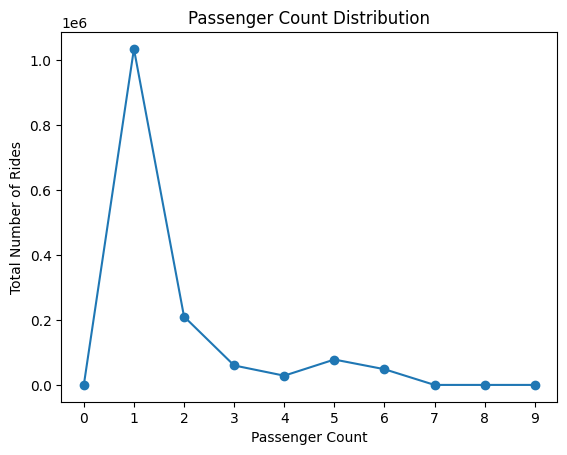

In [5]:
passenger_counts = df["passenger_count"].value_counts().sort_index()
print(passenger_counts)
plt.plot(passenger_counts.index, passenger_counts.values, marker='o', linestyle='-')
plt.xlabel("Passenger Count")
plt.ylabel("Total Number of Rides")
plt.xticks(passenger_counts.index)
plt.title("Passenger Count Distribution")
plt.show()

In [6]:
df = df.drop('id', axis=1)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['store_and_fwd_flag'] = le.fit_transform(df['store_and_fwd_flag'])
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435


In [8]:
num_feat = []
cate_feat = []
datetime_feat = []

for col in df.columns:
    dtype = df[col].dtype
    if pd.api.types.is_numeric_dtype(dtype):
        num_feat.append(col)
    elif pd.api.types.is_categorical_dtype(dtype) or pd.api.types.is_object_dtype(dtype):
        cate_feat.append(col)
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        datetime_feat.append(col)

print("Numerical Features:", num_feat)
print("Categorical Features:", cate_feat)
print("Datetime Features:", datetime_feat)

Numerical Features: ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration']
Categorical Features: ['pickup_datetime', 'dropoff_datetime']
Datetime Features: []


In [9]:
num_df = df[num_feat]

Text(0.5, 1.0, 'Correlation Matrix')

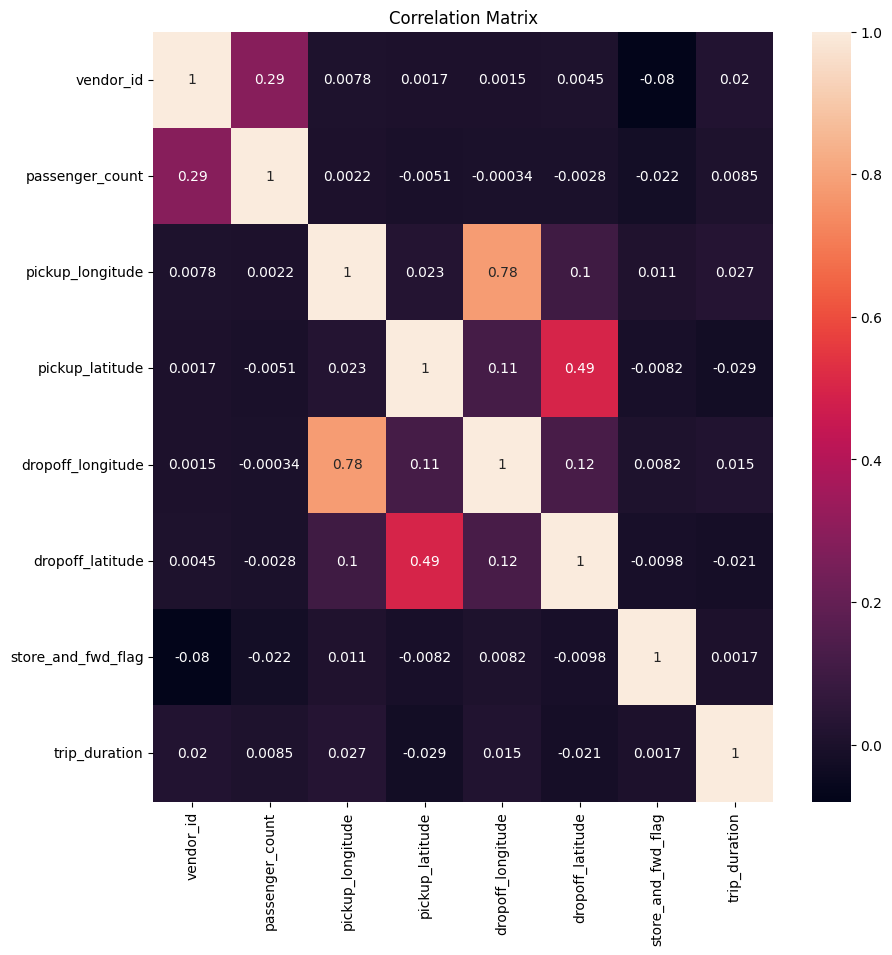

In [10]:
corr_matrix = num_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")

In [18]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['weekday'] = df['pickup_datetime'].dt.weekday 
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year
df['weekend'] = df['weekday'].isin([5,6]).astype(int)
df['plat'] = df['pickup_latitude']
df['plon'] = df['pickup_longitude']
df['dlat'] = df['dropoff_latitude']
df['dlon'] = df['dropoff_longitude']
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2)**2
    return R * 2 * np.arcsin(np.sqrt(a))

def bearing(lat1, lon1, lat2, lon2):
    dLon = np.radians(lon2 - lon1)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    x = np.sin(dLon) * np.cos(lat2)
    y = np.cos(lat1)*np.sin(lat2) - np.sin(lat1)*np.cos(lat2)*np.cos(dLon)
    return (np.degrees(np.arctan2(x, y)) + 360) % 360

def manhattan(latitude1, longitude1, latitude2, longitude2) :
    dlat = np.abs(latitude2 - latitude1)
    dlon = np.abs(longitude2 - longitude1) 
    lat_km = np.radians(dlat) * 6371
    lon_km = np.radians(dlon) * 6371 * np.cos(np.radians((latitude1 + latitude2)/2)) 
    return lat_km + lon_km

df['haversine_km'] = haversine(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])
df['manhattan_km'] = manhattan(df['plat'],df['plon'],df['dlat'],df['dlon'])
df['bearing'] = bearing(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])
pickup_coords = df[['pickup_latitude', 'pickup_longitude']].dropna()
dropoff_coords = df[['dropoff_latitude', 'dropoff_longitude']].dropna()
pickup_kmeans = KMeans(n_clusters=10, random_state=42).fit(pickup_coords)
df['pickup_cluster'] = pickup_kmeans.predict(df[['pickup_latitude', 'pickup_longitude']])
dropoff_kmeans = KMeans(n_clusters=10, random_state=42).fit(dropoff_coords)
df['dropoff_cluster'] = dropoff_kmeans.predict(df[['dropoff_latitude', 'dropoff_longitude']])

In [19]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,haversine_km,plat,plon,dlat,dlon,manhattan_km,bearing,is_zero_distance,pickup_cluster,dropoff_cluster
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,...,1.498521,40.767937,-73.982155,40.765602,-73.964630,1.735459,99.970196,False,0,8
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,...,1.805507,40.738564,-73.980415,40.731152,-73.999481,2.430596,242.846232,False,0,9
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,...,6.385098,40.763939,-73.979027,40.710087,-74.005333,8.204472,200.319835,False,0,9
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,...,1.485498,40.719971,-74.010040,40.706718,-74.012268,1.661350,187.262300,False,4,9
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,...,1.188588,40.793209,-73.973053,40.782520,-73.972923,1.199458,179.473585,False,3,8


In [20]:
num_feat = []
cate_feat = []
datetime_feat = []

for col in df.columns:
    dtype = df[col].dtype
    if pd.api.types.is_numeric_dtype(dtype):
        num_feat.append(col)
    elif pd.api.types.is_categorical_dtype(dtype) or pd.api.types.is_object_dtype(dtype):
        cate_feat.append(col)
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        datetime_feat.append(col)

print("Numerical Features:", num_feat)
print("Categorical Features:", cate_feat)
print("Datetime Features:", datetime_feat)

Numerical Features: ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'hour', 'day', 'weekday', 'month', 'year', 'weekend', 'haversine_km', 'plat', 'plon', 'dlat', 'dlon', 'manhattan_km', 'bearing', 'is_zero_distance', 'pickup_cluster', 'dropoff_cluster']
Categorical Features: []
Datetime Features: ['pickup_datetime', 'dropoff_datetime']


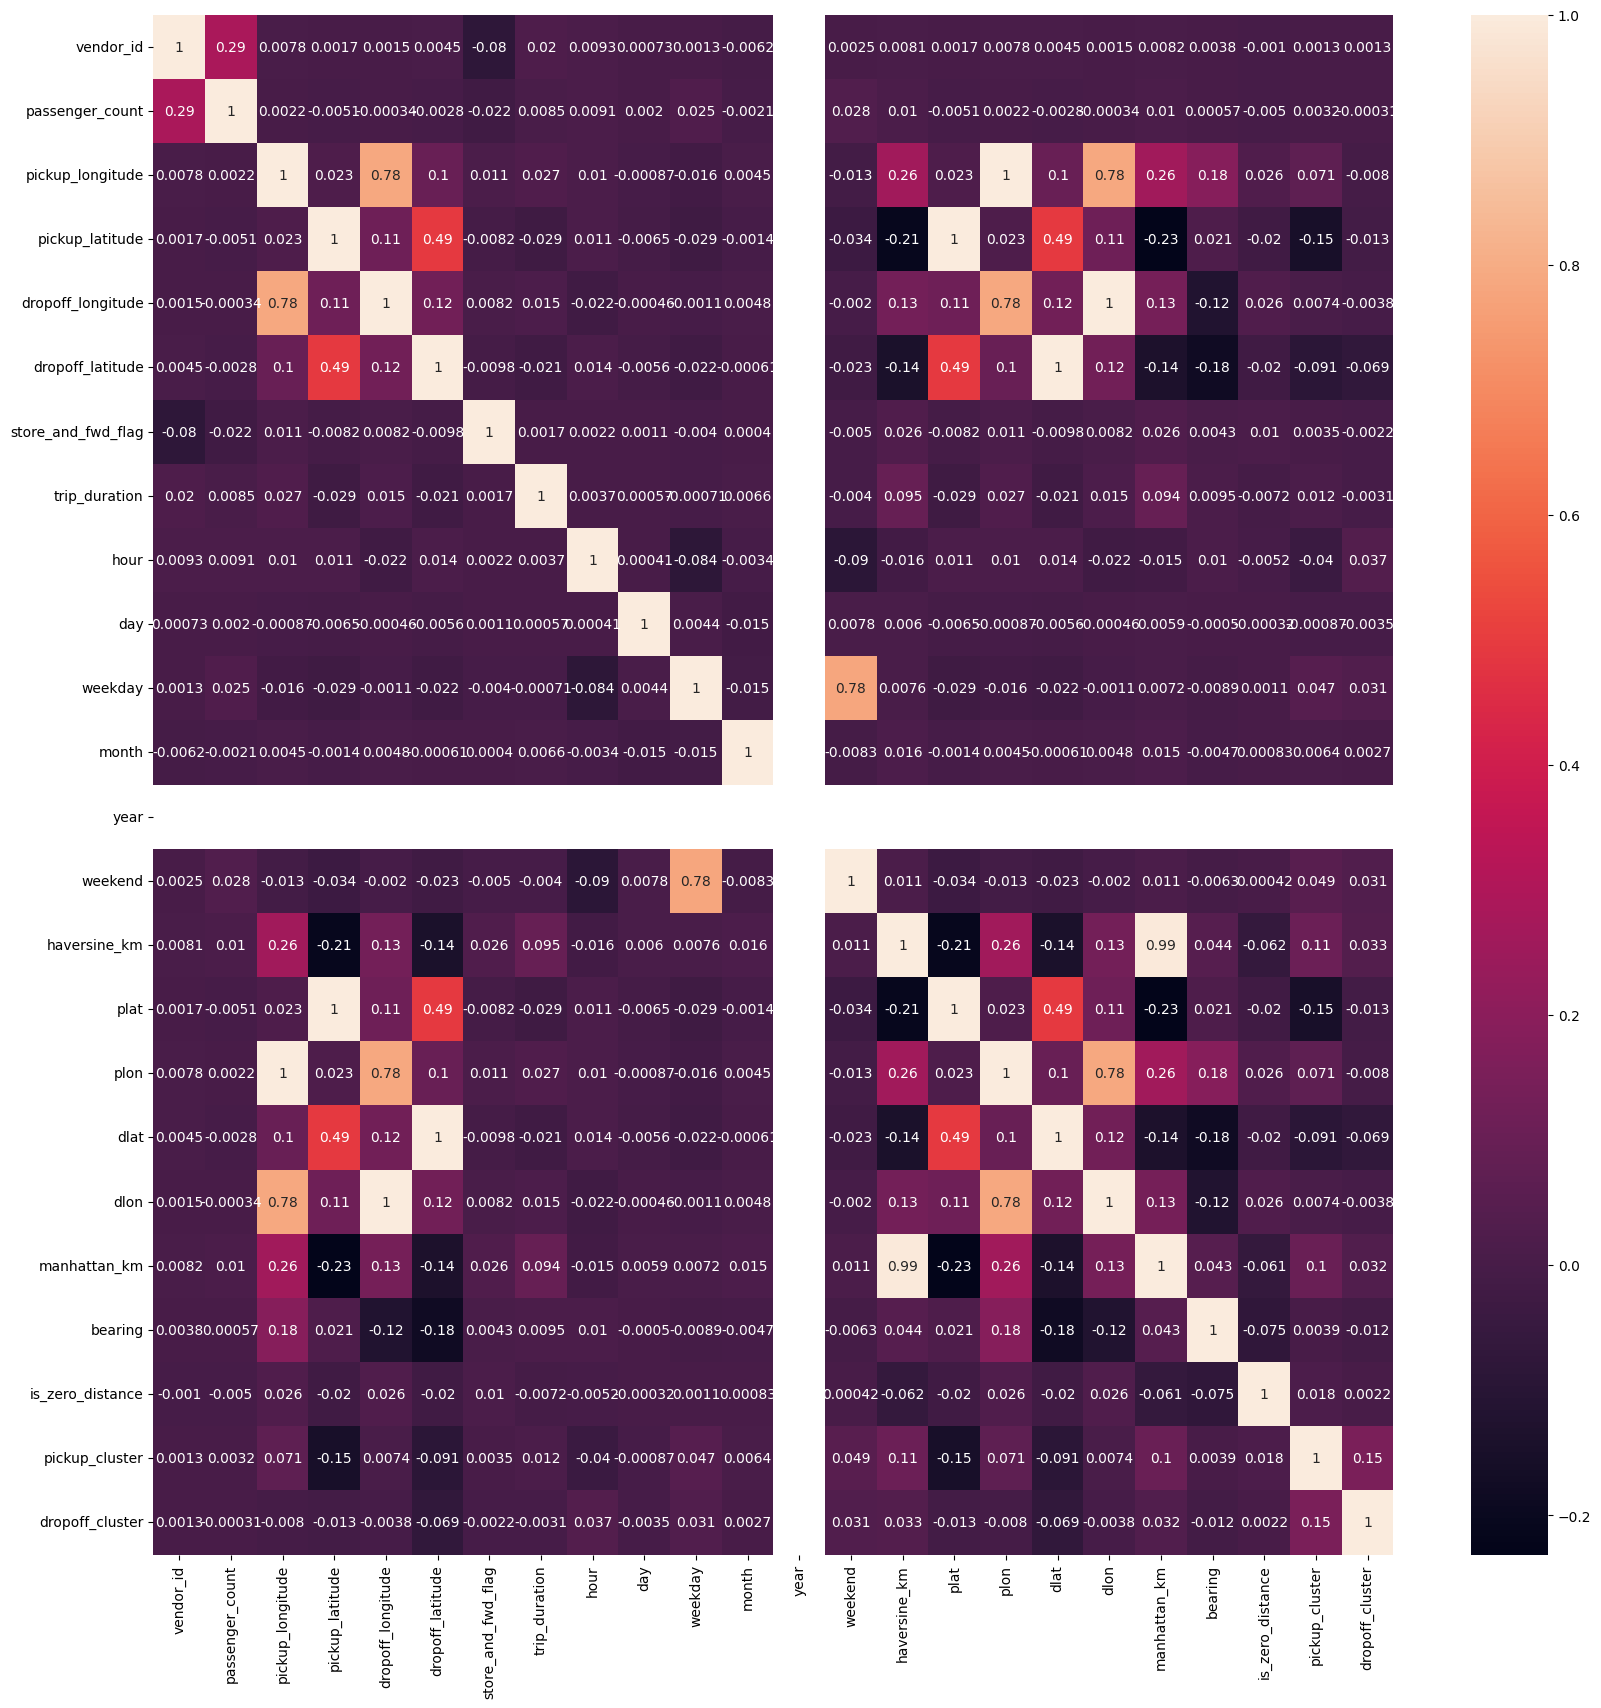

In [21]:
num_df = df[num_feat]
plt.figure(figsize=(20, 20))
corr_matrix = num_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [22]:
num_df = num_df.drop(['vendor_id', 'passenger_count'], axis=1)
num_df.to_csv(r'/home/long/longdata/kaggle compe/dataset/num_df.csv', index=False)

In [23]:
num_df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,day,weekday,month,...,haversine_km,plat,plon,dlat,dlon,manhattan_km,bearing,is_zero_distance,pickup_cluster,dropoff_cluster
0,-73.982155,40.767937,-73.964630,40.765602,0,455,17,14,0,3,...,1.498521,40.767937,-73.982155,40.765602,-73.964630,1.735459,99.970196,False,0,8
1,-73.980415,40.738564,-73.999481,40.731152,0,663,0,12,6,6,...,1.805507,40.738564,-73.980415,40.731152,-73.999481,2.430596,242.846232,False,0,9
2,-73.979027,40.763939,-74.005333,40.710087,0,2124,11,19,1,1,...,6.385098,40.763939,-73.979027,40.710087,-74.005333,8.204472,200.319835,False,0,9
3,-74.010040,40.719971,-74.012268,40.706718,0,429,19,6,2,4,...,1.485498,40.719971,-74.010040,40.706718,-74.012268,1.661350,187.262300,False,4,9
4,-73.973053,40.793209,-73.972923,40.782520,0,435,13,26,5,3,...,1.188588,40.793209,-73.973053,40.782520,-73.972923,1.199458,179.473585,False,3,8


In [24]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.01, random_state=42)

In [25]:
# import os
# os.environ["TQDM_NOTEBOOK"] = "false"

In [26]:
# !jupyter nbextension enable --py widgetsnbextension

In [27]:
# from lazypredict.Supervised import LazyRegressor 
# from sklearn.metrics import mean_squared_log_error
# from tqdm import tqdm
# import lazypredict.Supervised
# lazypredict.Supervised.notebook_tqdm = tqdm
# def RMSLE(y_true, y_pred):
#     return np.sqrt(mean_squared_log_error(y_true, y_pred))
# reg = LazyRegressor(verbose=1, ignore_warnings=True, custom_metric=RMSLE)
# models, predictions = reg.fit(x_train, x_test, y_train, y_test)

In [28]:
# print(models)